# Report for Project 2 - Udacity Deep Reinforcement Learning Nanodegree

This notebook contains problem definition, solution and some analysis for the second project of Udacity's DRL Nanodegree


## Controlling an Arm with DDPG and PPO


![Screenshot of Reacher](Images/reacher.gif)

## 0. Load Data and Helpers

In [1]:
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from glob import glob

import seaborn as sns
sns.set(style='whitegrid', context='notebook', palette='icefire')

%matplotlib inline

In [2]:
def load_scores(file_name):
  with open(file_name, 'rb') as f:
    return pickle.load(f)

In [3]:
def plot_ppo(mean_rewards, entropy, N=100):
  plt.figure(figsize=(20, 12))
  plt.subplot(211)
  plt.axhline(y=30, color='gold', linestyle='-.', label="Solved Threshold")
  plt.plot(mean_rewards, label="Mean Reward")
  moving_average = np.convolve(mean_rewards, np.ones((N,))/N, mode='valid')
  plt.plot(range(int(N/2), len(moving_average)+int(N/2)), moving_average, color='red', label="Moving Average" )
  plt.axvline(x=np.argmax(moving_average>30)+int(N/2), color='green', linestyle='-.', label="Task Solved")
  plt.title("Rewards")
  plt.xlabel('Episode')
  plt.ylabel('Avg Reward for 20 Agents')
  plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=4)
  
  
  plt.subplot(212)
  plt.plot(entropy, label='Mean Entropy')
  plt.title("Entropy")
  plt.xlabel('Episode')
  plt.ylabel('Mean Entropy')
  plt.legend(loc='lower center', bbox_to_anchor=(0.5, 0.1), ncol=1)
  
  plt.show()
  
def plot_ddpg(mean_rewards, N=100):
  plt.figure(figsize=(20, 5))
  plt.subplot(111)
  plt.axhline(y=30, color='gold', linestyle='-.', label="Solve Threshold")
  plt.plot(mean_rewards, label="Reward")
  
  moving_average = np.convolve(mean_rewards, np.ones((N,))/N, mode='valid')
  plt.plot(range(int(N/2), len(moving_average)+int(N/2)), moving_average, color='red', label="Moving Average" )
  plt.axvline(x=np.argmax(moving_average>30)+int(N/2), color='green', linestyle='-.', label="Task Solved")
  plt.ylabel('Reward for 1 Agents')
  plt.title("Rewards")
  plt.xlabel('Episode')
  plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.25), ncol=4)
  plt.show()

In [4]:
ddpg_score_files = sorted(glob('Benchmark/DDPG/*.pkl'))
ppo_score_files = sorted(glob('Benchmark/PPO/SCORES_*.pkl'))
ppo_entropy_files = sorted(glob('Benchmark/PPO/ENTROPIES_*.pkl'))

In [5]:
ddpg_scores = [load_scores(s) for s in ddpg_score_files]
ppo_scores = [load_scores(s) for s in ppo_score_files]
ppo_entropy = [load_scores(s) for s in ppo_entropy_files]

## 1. Problem Formulation

In this environment, a double-jointed arm can move to target locations. A reward of ``+0.1`` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

### State Space

The observation space consists of ``33`` variables corresponding to position, rotation, velocity, and angular velocities of the arm. A sample observation looks like this :

```python
  0.00000000e+00 -4.00000000e+00  0.00000000e+00  1.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.00000000e+01  0.00000000e+00
  1.00000000e+00 -0.00000000e+00 -0.00000000e+00 -4.37113883e-08
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  5.75471878e+00 -1.00000000e+00
  5.55726671e+00  0.00000000e+00  1.00000000e+00  0.00000000e+00
 -1.68164849e-01
 ```

### Action Space

Each action is a vector with ``4`` numbers, corresponding to torque applicable to two joints. Every entry in the action vector should be a number between ``-1`` and ``1``.

### Solve Criteria

The Environment is considered solved if the average score for ``100`` consecutive episode reaches ``+30``. In the case that there are multiple agents in the environment, the score for each episode is the average score between each agent presented in the environment.


## 2. Experiments and Learning Algorithms Overview

In this section, a brief overview of used algorithms are introduced


----


## 2.1 Deep Determinist Policy Gradient

DDPG Description here!




**Table of Parameters**

| Parameter           	| Value                                                                                      	|
|---------------------	|----------------------------------------------------------------------------------------------	|
| $s \in S$          	| $s$ Denotes a state.                                                                         	|
| $a \in A$          	| $a$ Denotes an action.                                                                       	|
|$R$                	| Reward.                                                                                    	|
| $\gamma$           	| Discount Factor.                                                                          	|
| $\alpha$           	| Learning Rate.                                                                             	|
| $J(w)$            	| Loss function.                                                                            	|
| $w$           	| Weights for target Q Network.                                                                  	|
| $w^{-}$               	| Weights for current (local) Q Network.                                                  	|
|$Q(s, a)$     	        | Action-value function, How good is to take action $a$ in state $s$. 	                        |



**Algorithm**

![Screenshot of Reacher](Images/ddpg-algorihm.png)

### DDPG Scores




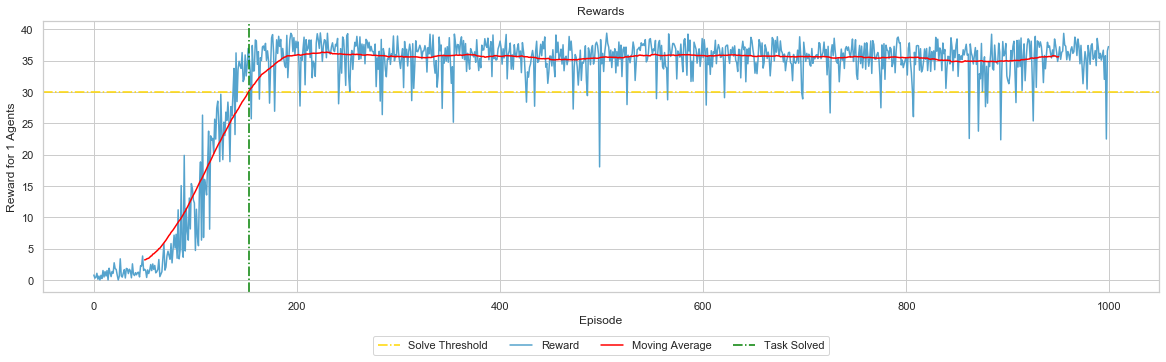

In [6]:
plot_ddpg(ddpg_scores[3])

----

## 2.2 Proximal Policy Optimization (PPO)


The main idea behind PPO is to clip the ratio between successive policy updates. Successive updates or even one large update on a current found policy will change it drastically so that it might fall into very bad local optima. A local optimum which makes it very hard, if possible at all, for our model to recover from.

The solution is Proximal Policy Optimization or PPO for short. It simply clips the ration between the current updated version of policy with the last version of it. With clipping this ratio, we don't allow our policy to have a large update, and we will prevent our model to fall into bad local optimas.


For solving this environment, A PPO with Actor-Critic fashion updates is used. In each step, the agent will predict ``Value`` for each state and also gives a distribution over Actions (Normal) to take.

**Algorithm**

![Screenshot of Reacher](Images/ppo-algorithm.png)

### PPO Scores


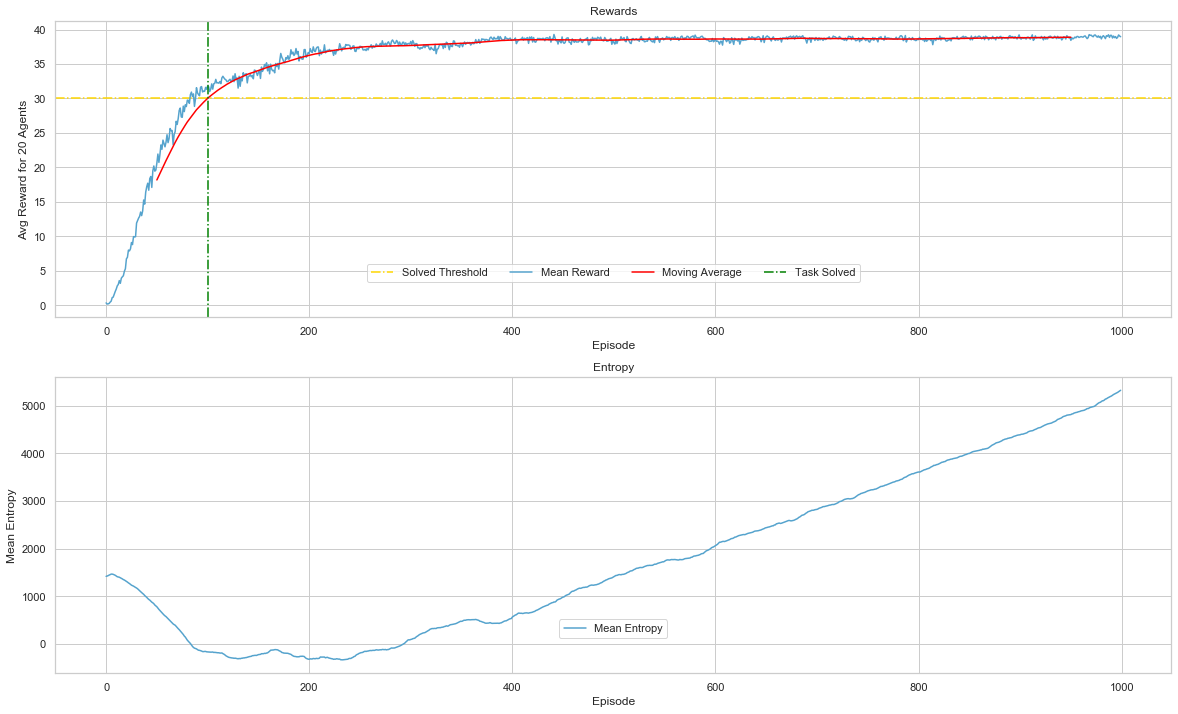

In [7]:
plot_ppo(ppo_scores[1], ppo_entropy[1])

----

# 3. Benchmark Results

## 3.1 Benchmark Results - DDPG vs PPO

For benchmarking, each algorithm executed ``5`` times and the average of all runs is considered. During each execution, the topology of networks as well as seeds is kept intact to have a meaningful comparison. The source of nondeterminism is the simulator (game) itself and with fixing topology and seeds, we wish to have a more meaningful and better comparison of the performance of each algorithm


### Parameters:



| Parameter           	| Value                                                                                      	|
|---------------------	|----------------------------------------------------------------------------------------------	|
| Episode Length      	| ``1000``                                                                                   	|
| Runs per Algorithm  	| ``5``                                                                                      	|
| Seed                	| ``0``                                                                                      	|


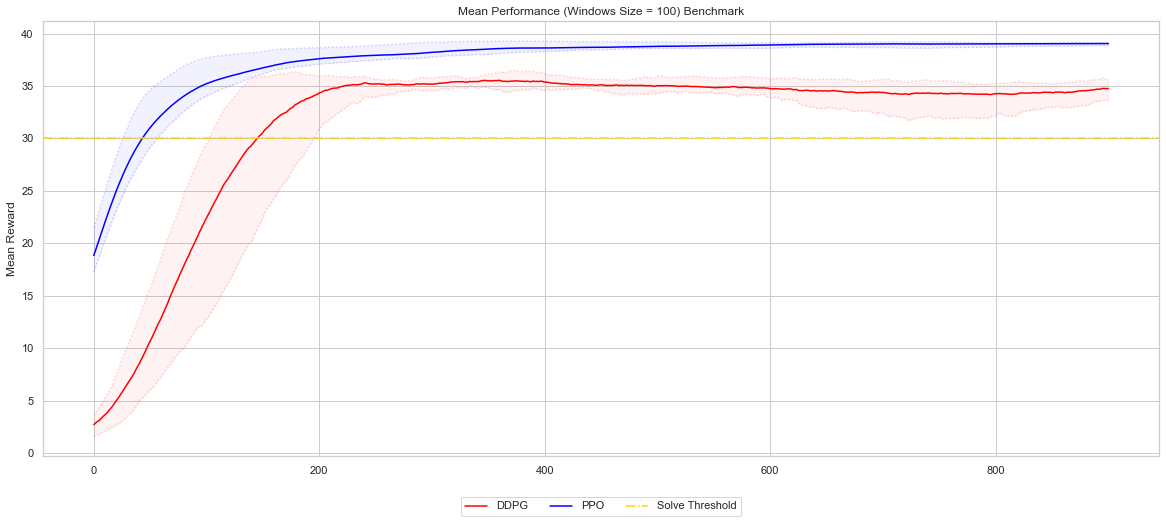

In [8]:
sns.set(style='whitegrid', context='notebook', palette='icefire')
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111)

N = 100

colors = ['red', 'blue', 'yellow', 'green']
labels = ['DDPG', 'PPO']

for i, S in enumerate([ddpg_scores, ppo_scores]):
  moving_average  = [np.convolve(t, np.ones((N,))/N, mode='valid') for t in S] 

  x1 = np.asarray(moving_average).mean(axis=0)
  x2 = np.asarray(moving_average).max(axis=0)
  x3 = np.asarray(moving_average).min(axis=0)

  plt.plot(x1, color=colors[i], label=labels[i])
  plt.plot(x2, color=colors[i], alpha=0.15, linestyle=':')
  plt.plot(x3, color=colors[i], alpha=0.15, linestyle=':')

  plt.fill_between(range(len(x1)), x2, x3, alpha=0.05, color=colors[i])

plt.ylabel('Mean Reward')
plt.axhline(y=30, color='gold', linestyle='-.', label="Solve Threshold")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.title("Mean Performance (Windows Size = 100) Benchmark")
plt.show()  

As shown in the graph, The PPO algorithm is far better than DDPG in this task.

# 4. Agents in Action

The ``movies`` folder contains a record of each successful algorithm. 


![Screenshot of Reacher](Images/reacher.gif)


Full length video can be found here: ``movies/PPO.mp4``

In [9]:
from IPython.display import HTML

# HTML('<iframe width="560" height="315" src="//www.youtube.com/embed/" frameborder="0" allowfullscreen></iframe>')

# 5. Ideas for Future Work

This experiment showed us the power of two great algorithms, PPO and DDPG. For future work, we can more investigate the sensitivity and performance of these algorithms on solving the task. For example in all of the tests performed here, PPO's inner loop iterations were set to ``4`` (number of gradient steps performed on each iteration). We can do a sensitivity analysis for this number. Can we increase this number?

Another interesting thing to explore is the effect of network architecture on the performance of the agent. Currently, A very simple multi-layer feed-forward network is used for networks, one can investigate the effect of size of each layer in the performance of the agent.

Of course, Another hyperparameter sensitivity analysis is an interesting thing to analyze and experiment with.

# 6. Sources

1. Continuous control with deep reinforcement learning [[Arixv](https://arxiv.org/abs/1509.02971)]
1. Deep Deterministic Policy Gradient - OpenAI Spinning Up RL - [[Websit](https://spinningup.openai.com/en/latest/algorithms/ddpg.html)]
1. High-Dimensional Continuous Control Using Generalized Advantage Estimation [[Arxiv](https://arxiv.org/abs/1506.02438)]
1. Proximal Policy Optimization Algorithms [[Arxiv](https://arxiv.org/abs/1707.06347)]
1. Proximal Policy Optimization Algorithms - OpenAI Spinning Up RL [[Website](https://spinningup.openai.com/en/latest/algorithms/ppo.html)]
1. RL-Adventure-2 - [[Github Repository](https://github.com/higgsfield/RL-Adventure-2)]


Image for each algorithm taken from  OpenAI Spinning Up website